In [1]:
pip install split-folders

In [2]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: schwingling
Your Kaggle Key: ··········


100%|██████████| 2.04G/2.04G [00:23<00:00, 94.6MB/s]


In [3]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications import densenet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from keras.utils import image_dataset_from_directory

In [4]:
import splitfolders  # or import split_folders

splitfolders.ratio('/content/plantvillage-dataset/plantvillage dataset/color', output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 54305 files [00:13, 4003.47 files/s]


In [18]:

train_generator= image_dataset_from_directory('/content/output/train',
                                                 seed=123,
                                                 image_size=(224,224),
                                                 batch_size=32,
                                                 label_mode='categorical',
                                                 shuffle=True)

Found 43429 files belonging to 38 classes.


In [19]:

val_generator=image_dataset_from_directory('./output/val',
                                                 image_size=(224,224),
                                                 seed=123,
                                                 batch_size=32,
                                                 label_mode='categorical',
                                                 shuffle=True)

Found 5417 files belonging to 38 classes.


In [20]:
base_model=MobileNet(weights='imagenet',include_top=False)
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(38,activation='softmax'))

In [8]:
for layer in model.layers[1:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32)


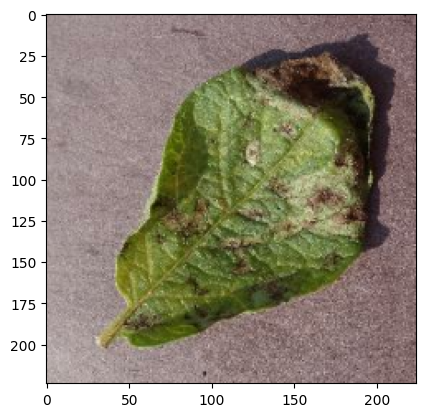

In [21]:
for batch in train_generator:
  images = batch[0]
  labels = batch[1]
  plt.imshow(images[1].numpy().astype("uint8"))
  plt.show
  print(labels)
  break

In [ ]:
from keras.metrics import AUC,Precision,Recall
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',AUC(),Precision(),Recall()])
step_size_train=1358
MobileNet_model=model.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
 683/1358 [==============>...............] - ETA: 1:23 - loss: 0.5717 - accuracy: 0.8395 - auc_2: 0.9884 - precision_2: 0.8971 - recall_2: 0.7946

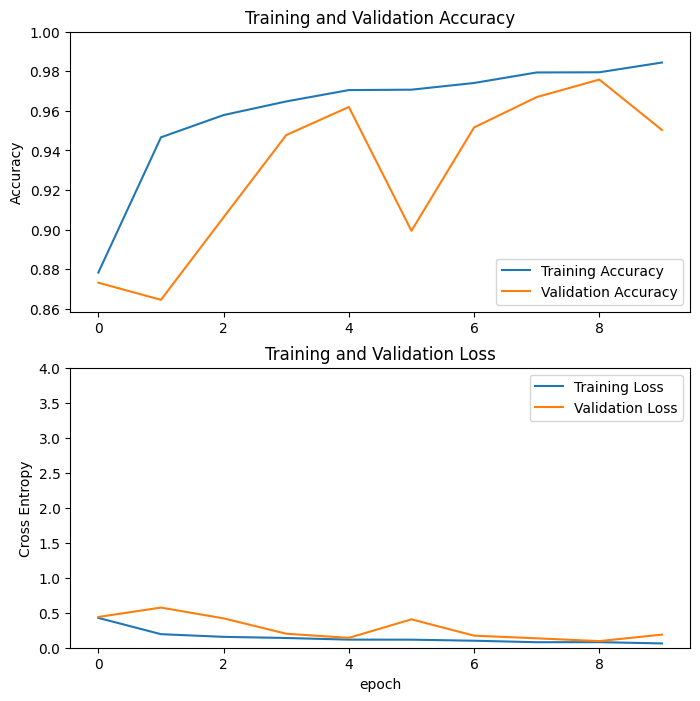

In [ ]:
acc = MobileNet_model.history['accuracy']
val_acc = MobileNet_model.history['val_accuracy']

loss = MobileNet_model.history['loss']
val_loss = MobileNet_model.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_generator= image_dataset_from_directory('/content/output/test', # this is where you specify the path to the main data folder
                                                 image_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 label_mode='categorical',
                                                 shuffle=False)

Found 5459 files belonging to 38 classes.


In [ ]:
test_score=model.evaluate(test_generator)

5459/5459 [==============================] - 44s 8ms/step - loss: 0.1746 - accuracy: 0.9551 - auc: 0.9959 - precision: 0.9651 - recall: 0.9483


In [ ]:
labels = train_generator.class_names
labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [16]:
for images_batch, labels_batch in test_generator.take(1):

    image = images_batch[0].numpy().astype("uint8")
    label = labels_batch[0].numpy().astype("uint8")

    plt.imshow(image)
    print(labels_batch[0])
    print("actual label:", labels[label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

NameError: ignored